In [1]:
import cv2

from tensordoc.layout_detector import LayoutDetectorFactory, LayoutDetectorType
from tensordoc.ocr import OCRFactory, OCRType
from tensordoc.utils.visualize import visualize_image
from tensordoc.components import Layout

from layoutparser import draw_box

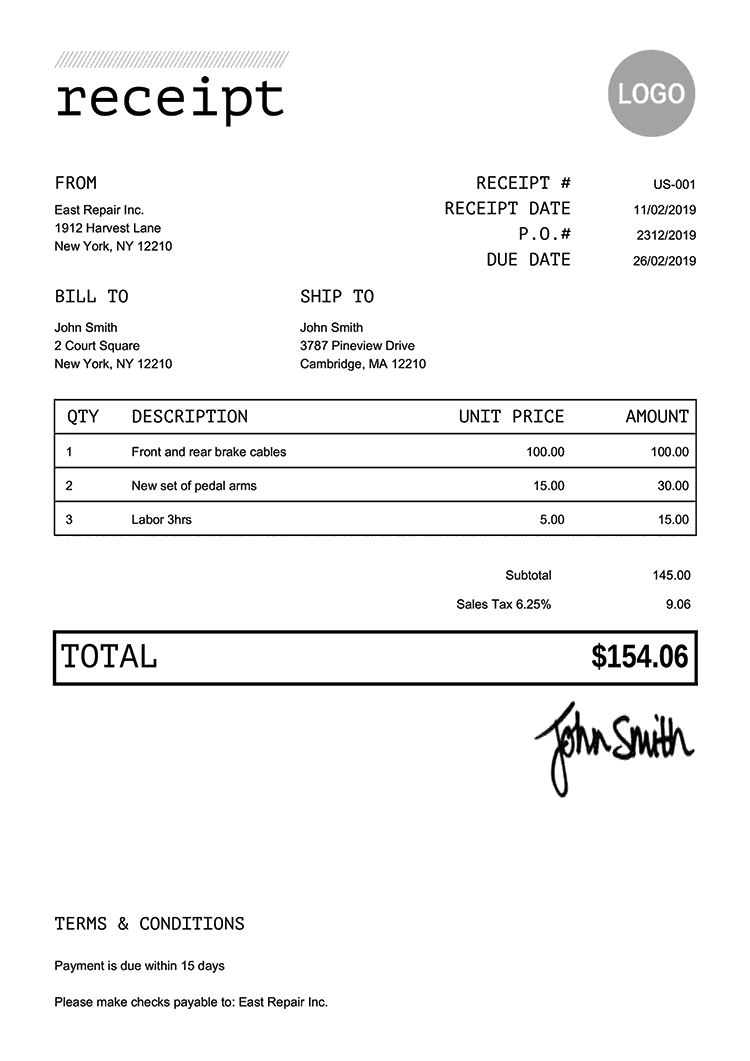

In [2]:
image = cv2.imread("./data/sample.png")
visualize_image(image)

/opt/homebrew/Caskroom/miniforge/base/envs/tensordoc/lib/python3.12/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch

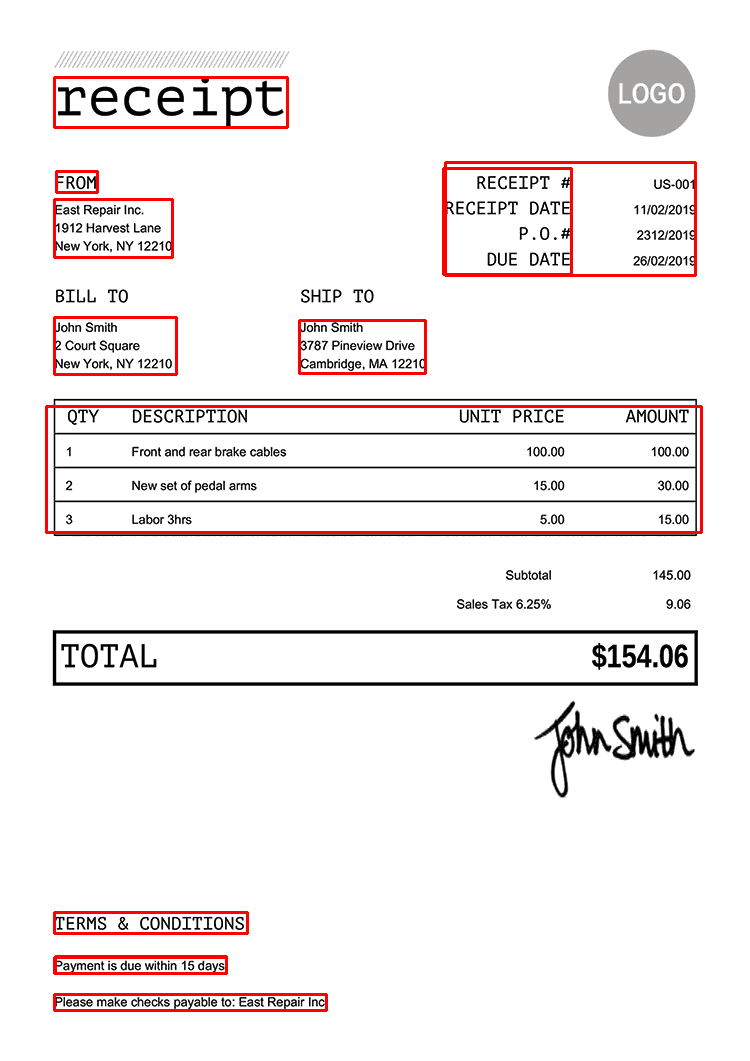

In [15]:
cfg = {"detection_threshold":0.35}
layout_detector = LayoutDetectorFactory.get_layout_detector(LayoutDetectorType.FASTER_RCNN, **cfg)
layout = layout_detector.process(image)

components_to_ocr = ["Text", "Title", "List", "Table"]
text_blocks = Layout([l for l in layout if l.type in components_to_ocr])
draw_box(image, text_blocks, box_width=3)

In [16]:
ocr_agent = OCRFactory.get_ocr(OCRType.TESSERACT, lang="eng")

Please make checks payable to: East Repair Inc.

----------------------------------------------------------------------------------------------------


Payment is due within 15 days

----------------------------------------------------------------------------------------------------


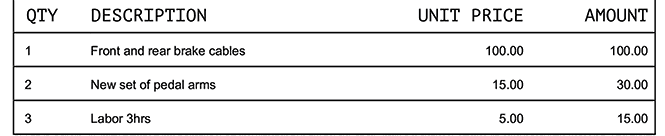

QTY DESCRIPTION UNIT PRICE AMOUNT
1 Front and rear brake cables 100.00 100.00
2 New set of pedal arms 15.00 30.00
3 Labor 3hrs 5.00 15.00


----------------------------------------------------------------------------------------------------


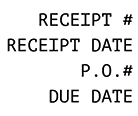

RECEIPT #
RECEIPT DATE
P.O.#

DUE DATE

----------------------------------------------------------------------------------------------------


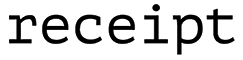

receipt

----------------------------------------------------------------------------------------------------


TERMS & CONDITIONS

----------------------------------------------------------------------------------------------------


FROM

----------------------------------------------------------------------------------------------------


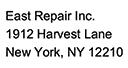

East Repair Inc.
1912 Harvest Lane
New York, NY 12210

----------------------------------------------------------------------------------------------------


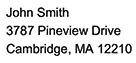

John Smith
3787 Pineview Drive
Cambridge, MA 12210

----------------------------------------------------------------------------------------------------


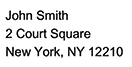

John Smith
2 Court Square
New York, NY 12210

----------------------------------------------------------------------------------------------------


Payment is due within 15 days

----------------------------------------------------------------------------------------------------


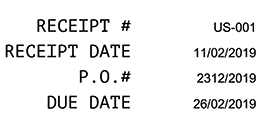

RECEIPT # us-001
RECEIPT DATE 11/02/2019
P.O.# 2312/2019

DUE DATE 26/02/2019

----------------------------------------------------------------------------------------------------


In [17]:

for layout_component in text_blocks:
    segment_image = (layout_component
                     .pad(left=5, right=5, top=5, bottom=5)
                     .crop_image(image))
    text = ocr_agent.process(segment_image)
    layout_component.set(text=text, id=text, inplace=True)
    visualize_image(segment_image)
    print(text)
    print("-"*100)